# 回归
线性回归 (linear regression) 是一种线性模型，它假设输入变量 $x$ 和单个输出变量 $\hat y$（$y$ 的估计值） 之间存在线性关系

具体来说，利用线性回归模型，可以从一组输入变量 $x$ 的线性组合中， 计算输出变量 $\hat y$ 以及参数 $\beta$ 和 $\epsilon$：
$$
\begin{gathered}
\boldsymbol{\hat y}=\boldsymbol{\beta}\boldsymbol{x}+\boldsymbol{\epsilon}
\end{gathered}
$$

给定有 $n$ 个特征描述的样本 $x=(x_1 , x_2 , \ldots , x_n)$ ，其中 $x_i$ 是 $x$ 在第 $i$ 个特征上的取值，线性模型试图获得一个通过特征的线性组合来进行预测的函数，即：
$$
f(\boldsymbol{x})=\beta_1 x_1+\beta_2 x_2+\ldots+\beta_d x_n+\epsilon
$$
用矩阵形式写成:
$$
f(\boldsymbol{x})=\boldsymbol{\beta} \boldsymbol{x}+\epsilon
$$
假设特征和结果都满足线性，即不大于一次方。获得 $\beta$ 和 $\epsilon$ 之后，模型就得以确定。
## 核心思想
大量数据进行统计分析，从而获得回归方程、获得预测的估计值

## 基本步骤

1. 确定回归模型属于那种基本类型，然后通过计算得到回归方程的表达式
    1. 根据试验数据画出散点图（1.1）
    2. 确定经验公式的函数类型（1.1）
    3. 通过最小二乘法得到拟合的测试数据（1.2，1.3）
    4. 根据拟合数据绘制拟合曲线，并得到回归方程的表达式（1.4，1.5）
2. 对回归模型进行显著性检验。
    1. 相关系数检验，检验线性相关程度的大小
    2. F检验法（这两种检验方法可以任意选）
    3. 残差分析
    4. 对于多元回归分析还要进行因素的主次排序

（如果检验结果表示此模型的显著性很差，应当另选回归模型）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

## 最小二乘法

基于均方误差最小化来进行模型求解的方法称为"最小二乘法" (leastsquare method)，它的主要思想就是选择未知参数，使得理论值与观测值之差的平方和达到最小。

我们假设输入属性 (特征) 的数目只有一个：$f\left(x_i\right)=\hat y = \beta x_i+\epsilon$，使得 $f\left(x_i\right) \simeq y_i$，其中 $\hat y$ 记作 $y$ 的估计值

在线性回归中，最小二乘法就是试图找到一条直线 (即一组最优参数 $(\beta, \epsilon)$)，使目标损失函数，即所有样本到直线上的欧式距离之和 $E\left(\beta, \epsilon\right)$ 最小。
$$
\begin{aligned}
E\left(\beta, \epsilon\right) & =\underset{(\beta, \epsilon)}{\min } \sum_{i=1}^n\left(f\left(x_i\right)-y_i\right)^2 \\
& =\underset{(\beta, \epsilon)}{\min } \sum_{i=1}^n\left(y_i-\beta x_i-\epsilon\right)^2
\end{aligned}
$$

## 简单线性回归
**线性回归模型的最小二乘参数估计：**

求解 $\mathrm{\beta}$ 和 $\epsilon$ ，使得 $E_{(\beta, \epsilon)}=\sum_{i=1}^m\left(y_i-\beta x_i-\epsilon\right)^2$ 最小化的过程，称为线性回归模型的“最小二乘参数估计"

将 $E_{(\beta, \epsilon)}$ 分别对 $\mathrm{\beta}$ 和 $\epsilon$ 求偏导，可以得到
$$
\begin{gathered}
\frac{\partial E_{(\beta, \epsilon)}}{\partial \beta}=\sum_{i=1}^{n}2\left(y_{i}-\left(\beta x_{i}+\epsilon\right)\right)\cdot\left(-x_{i}\right) \\
\frac{\partial E_{(\beta, \epsilon)}}{\partial \epsilon}=\sum_{i=1}^{n}2\left(y_{i}\,-\,\left(\beta x_{i}\,+\,\epsilon\right)\right)\cdot\,\left(-1\right)
\end{gathered}
$$

令偏导数为 0 ，可以得到

$$
\beta=\frac{\sum_{i=1}^n \left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum_{i=1}^n \left( x_i-\bar{x}\right)^2} \quad \epsilon=\bar{y}-\bar{x}\beta
$$
其中 $\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i$，$\bar{y}=\frac{1}{n} \sum_{i=1}^n y_i$

### 1.1.画散点图
根据散点图，确定接下来所用公式的函数类型（线性）

Text(0.5, 1.0, 'Scatterplot of sample data')

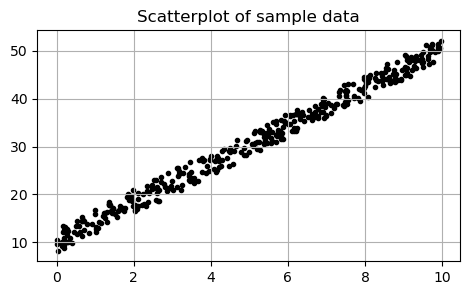

In [2]:
# Generate random data xdata and ydata
randseed = np.random.RandomState(1)
f = lambda t: 8 + 4 * t + randseed.rand(500)*5
xdata= 10 * randseed.rand(500)
ydata = f(xdata)
xtrain = xdata[:400][:,np.newaxis]
ytrain = ydata[:400]
xtest = xdata[400:][:,np.newaxis]
ytest = ydata[400:]

# Generate a scatterplot with xtrain, ytrain
fig = plt.figure(figsize =(12,3))
fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
plt.grid(True)
plt.title('Scatterplot of sample data')


### 1.2.训练模型
用普通最小二乘法，使用sklearn库的线性回归方法LinearRegression

In [3]:
# Linear regression evaluator, fitting data to get a fitted straight line
model = linear_model.LinearRegression()
# Fitting the straight line: (x,y)
# x[:,np.newaxis]: Turn the array into (n,1) shape
model.fit(xtrain,ytrain)


LinearRegression()

### 1.3.对测试数据进行预测
根据测试数据x，预测数据y

In [4]:
# Create test data xtest, and predict ytest according to the fitting curve
ytest_predict = model.predict(xtest)


### 1.4.绘制拟合直线和误差线

Text(0.5, 1.0, 'Linear regression fit')

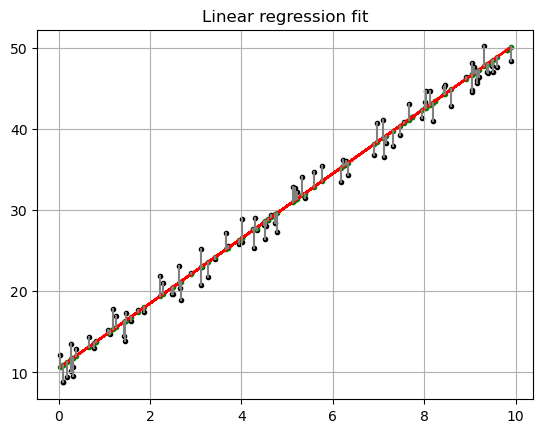

In [5]:
# Draw scatter plots, linear regression fitted straight line
fig.add_subplot(1,2,2)
# Scatterplot of test data
plt.scatter(xtest,ytest,marker = '.',color = 'k')
# the fitted straight line
plt.plot(xtest,ytest_predict,color = 'r')
# Scatterplot of predicted data
plt.scatter(xtest,ytest_predict,marker = '.',color = 'g')
# error lines, .flatten():2D to 1D
plt.plot([xtest.flatten(),xtest.flatten()],[ytest,ytest_predict],color = 'gray')
plt.grid()
plt.title('Linear regression fit')


### 1.5.打印直线参数和直线方程
回归方程参数及表达式

In [6]:
print('slope: %.4f' % model.coef_[0])
print('intercept: %.4f' % model.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(model.coef_[0],model.intercept_))


slope: 3.9962
intercept: 10.5072
The linear regression function: y = 3.9962x + 10.5072


### 2.评估简单线性回归模型
直接调用sklearn库的评价方法$R^2$，数值越接近1越好

其余方法后面介绍

In [7]:
r2 = model.score(xtest,ytest)
print("R-square: %.5f" % r2)

R-square: 0.98607


## 多元线性回归

现在有 $m$ 个样本，每个样本有 $n$ 个特征描述，记做 $x_{i,j}$，表示第 $i$ 个样本在第 $j$ 个特征上的取值

将所有样本点带入，有：
$$
\begin{array}{l}
{{\boldsymbol{\hat y}_{1}=\beta_{0}+\beta_{1}{x}_{1,1}+\beta_{2}{x}_{1,2}+\dots+\beta_{n}{x}_{1,{n}}}} \\
{{\boldsymbol{\hat y}_{2}\ =\beta_{0}+\beta_{1}{x}_{2,1}+\beta_{2}{x}_{2,2}+\dots+\beta_{{n}}{x}_{2,{n}}}} \\ \vdots \\ 
{{\boldsymbol{\hat y}_{m}\ =\beta_{0}+\beta_{1}{x}_{m,1}+\beta_{2}{x}_{m,2}+\dots+\beta_{{n}}{x}_{m,{n}}}}
\end{array}
$$

上述方程组可以用矩阵表示为：$$\boldsymbol{\hat y}=\boldsymbol{x}\boldsymbol{\beta}$$

其中，$\boldsymbol{x}$ 为 $m \times n$，$\boldsymbol{\beta}$ 为 $n \times 1$

于是目标损失函数可表示为：
$$
\begin{aligned}
E(\beta)=&\|\boldsymbol{\hat y}-\boldsymbol{y}\|^{2}=\|\boldsymbol{x}\boldsymbol{\beta}-\boldsymbol{y}\|^{2}=(\boldsymbol{x}\boldsymbol{\beta}-\boldsymbol{y})^{{{T}}}(\boldsymbol{x}\boldsymbol{\beta}-\boldsymbol{y}) = (\boldsymbol{\beta}^T\boldsymbol{x}^T-\boldsymbol{y}^T)(\boldsymbol{x}\boldsymbol{\beta}-\boldsymbol{y}) \\
=&\boldsymbol{y}^T\boldsymbol{y}-\boldsymbol{y}^T\boldsymbol{x}\boldsymbol{\beta}-\boldsymbol{\beta}^T\boldsymbol{x}^T\boldsymbol{y}+\boldsymbol{\beta}^T\boldsymbol{x}^T\boldsymbol{x}\boldsymbol{\beta} \\
=&\boldsymbol{y}^T\boldsymbol{y}-2\boldsymbol{\beta}^T\boldsymbol{x}^T\boldsymbol{y}+\boldsymbol{\beta}^T\boldsymbol{x}^T\boldsymbol{x}\boldsymbol{\beta} \\
\end{aligned}
$$
求 $\beta$ 偏导数：
$$\frac{\partial E{(\beta)}}{\partial \beta}=-2\boldsymbol{x}^T\boldsymbol{y}+2\boldsymbol{x}^T\boldsymbol{x}\boldsymbol{\beta}$$
令 $\beta$ 偏导数为0，可以解得 $\hat \beta$：
$${\boldsymbol{\hat \beta}}=\left(\boldsymbol{x}^{T}\boldsymbol{x}\right)^{-1}\boldsymbol{x}^{T}\boldsymbol{y}$$


### 生成可用的数据
多元，设自变量'b1','b2','b3','b4'，因变量'y'.

scatter_matrix方法：绘制出每个数值相对于其他数值的相关值。

因为如果将每个变量都与自身相对，那么主对角线将全都是直线，毫无意义。所以取而代之的方法是显示了每个数值的直方图。


In [21]:
# Generate four sets of data
randseed = np.random.RandomState(5)  
xdata = 10 * randseed.rand(100,4) 
print(xdata)
ydata = 20 + np.dot(xdata ,[1.5,2,-4,3])
df_train = pd.DataFrame(xdata[:80], columns = ['b1','b2','b3','b4']) # Convert to tabular form

df_train['y'] = ydata[:80]
df_test = pd.DataFrame(xdata[80:], columns = ['b1','b2','b3','b4']) # Convert to tabular form
df_test['y'] = ydata[80:]

# pd.plotting.scatter_matrix(df_train, marker='o', hist_kwds={'bins':20})

# fig.add_subplot(1,2,2)
# plt.scatter(df_train[['b1']],df_train[['b2']],marker = 'o',color = 'k')
# plt.hist(df_train[['b1']],color = 'g',bins=20)
# plt.show()

[[2.21993171e+00 8.70732306e+00 2.06719155e+00 9.18610908e+00]
 [4.88411189e+00 6.11743863e+00 7.65907856e+00 5.18417988e+00]
 [2.96800502e+00 1.87721229e+00 8.07412688e-01 7.38440296e+00]
 [4.41309223e+00 1.58309868e+00 8.79937031e+00 2.74086462e+00]
 [4.14235019e+00 2.96079933e+00 6.28787909e+00 5.79837810e+00]
 [5.99929197e+00 2.65819118e+00 2.84685881e+00 2.53588206e+00]
 [3.27563948e+00 1.44164301e+00 1.65612861e+00 9.63930529e+00]
 [9.60226715e+00 1.88414656e+00 2.43065616e-01 2.04555546e+00]
 [6.99843614e+00 7.79514586e+00 2.29330924e-01 5.77662858e+00]
 [1.64217272e-02 5.15472612e+00 6.39795176e+00 9.85624403e+00]
 [2.59097596e+00 8.02496885e+00 8.70483087e+00 9.22749614e+00]
 [2.21421253e-02 4.69488372e+00 9.81468738e+00 3.98944804e+00]
 [8.13732478e+00 5.46456498e+00 7.70854087e+00 4.84931075e+00]
 [2.91115637e-01 8.65256884e-01 1.11453812e+00 2.51245112e+00]
 [9.64915293e+00 6.31766053e+00 8.16660203e+00 5.66081996e+00]
 [6.35356206e+00 8.11902391e+00 9.26682615e+00 9.126267

### 多元回归拟合

In [9]:
model = linear_model.LinearRegression()
model.fit(df_train[['b1','b2','b3','b4']],df_train['y'])

print('slope: ' ,model.coef_)
print('intercept: %.4f' % model.intercept_)
print('linear regression function: y = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4 + %.1f' 
      % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))


slope:  [ 1.5  2.  -4.   3. ]
intercept: 20.0000
linear regression function: y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4 + 20.0


## 模型评估方法

### 平均绝对误差(MAE）
MAE用来衡量预测值与真实值之间的平均绝对误差，MAE越小表示模型越好，其定义如下：

${MAE}=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-{y}^{\prime}_{i}|,\ \in\left[0,+\infty\right)\ \left(1\right)$

In [10]:
def MAE(y, y_pre):
    return np.mean(np.abs(y - y_pre))

### 均方误差（MSE）
MSE也是回归中最普通的评价指标，MSE越小表示模型越好，其定义如下：

$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2},~\in[0,+\infty)~~(2)$

In [11]:
def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)

### 均方根误差（RMSE）
RMSE是在MSE的基础之上开根号而来，也是量化回归模型整体误差的标准方法

RMSE越小表示模型越好，其定义如下：

$R M S E=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2}},\ \in\,[0,+\infty)\ \ \ (3)$

In [12]:
def RMSE(y, y_pre):
    return np.sqrt(MSE(y, y_pre))

### 平均绝对百分比误差（MAPE）
MAPE和MAE类似，只是在MAE的基础上做了标准化处理，MAPE越小表示模型越好，其定义如下：

$M A P E=\frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_{i}-{y}^{\prime}_{i}}{y_{i}}\right|,\;\;\in\left[0,+\infty\right)\;\;(4)$

In [13]:
def MAPE(y, y_pre):
    return np.mean(np.abs((y - y_pre) / y))

### $R^2$评价指标
sklearn在实现线性回归时默认采用了该指标，越接近1表示模型越好，其定义如下：

$R^{2}\,=\,1\,-\,\frac{\sum_{i=1}^{n}(y_{i}-{y}^{\prime}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\overline{{y}})^{2}}\,\in\,[0,1]\;\;\;\;(5)$

其中 $\overline{{y}}$ 表示真实值的平均值。$R^2$的好处在于其结果进行了归一化，更容易看出模型间的差距。

In [14]:
def R2(y, y_pre):
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1 - (u / v)

## 评估之前多元线性回归的模型

In [15]:
ytest_predict = model.predict(df_test[['b1','b2','b3','b4']]) # ytest, predicted data
ytest = df_test['y'] # ytest, Raw data

print("MAE:", MAE(ytest, ytest_predict))
print("MSE:", MSE(ytest, ytest_predict))
print("RMSE:", RMSE(ytest, ytest_predict))
print("MAPE:", MAPE(ytest, ytest_predict))
print("R2:", R2(ytest, ytest_predict), model.score(df_test[['b1','b2','b3','b4']],ytest))

MAE: 1.8207657603852567e-14
MSE: 4.44444234001518e-28
RMSE: 2.1081846076696366e-14
MAPE: 7.023363263040078e-16
R2: 1.0 1.0


## 非线性回归
以基于多项式的回归模型为主，即用曲线方程代替直线方程拟合坐标图上各点，使得各点到曲线的距离总和最短。

假设有 $m$ 个样本，每个样本有 $n$ 个特征描述。将所有样本点带入，有：
$$
\begin{array}{l}
{{\boldsymbol{\hat y}_{1}=\beta_{0}+\beta_{1}{x}_{1}+\beta_{2}{x}_{1}^2+\dots+\beta_{n}{x}_{1}^n}} \\
{{\boldsymbol{\hat y}_{2}\ =\beta_{0}+\beta_{1}{x}_{2}+\beta_{2}{x}_{2}^2+\dots+\beta_{n}{x}_{2}^n}} \\ \vdots \\ 
{{\boldsymbol{\hat y}_{m}\ =\beta_{0}+\beta_{1}{x}_{m}+\beta_{2}{x}_{m}^2+\dots+\beta_{n}{x}_{m}^n}}
\end{array}
$$
化成矩阵形式：${y}={X}\beta+\epsilon$

$\text { 其中: } {y}=\left[\begin{array}{c}\mathrm{y}_1 \\\mathrm{y}_2 \\\vdots \\\mathrm{y}_{\mathrm{m}}\end{array}\right], {X}=\left[\begin{array}{ccccc}1 & \mathrm{x}_1 & \mathrm{x}_1^2 & \cdots & \mathrm{x}_1^{\mathrm{n}} \\1 & \mathrm{x}_2 & \mathrm{x}_2^2 & \cdots & \mathrm{x}_2^{\mathrm{n}} \\\vdots & \vdots & \vdots & \ddots & \vdots \\1 & \mathrm{x}_{\mathrm{m}} & \mathrm{x}_{\mathrm{m}}^2 & \cdots & \mathrm{x}_{\mathrm{m}}^{\mathrm{n}}\end{array}\right], \beta=\left[\begin{array}{c}\beta_0 \\\beta_1 \\\beta_2 \\\vdots \\\beta_{\mathrm{n}}\end{array}\right], \epsilon=\left[\begin{array}{c}\epsilon_0 \\\epsilon_1 \\\epsilon_2 \\\vdots \\\epsilon_{\mathrm{m}}\end{array}\right]$

令${{x}_{1}}={{x}},\;{{x}_{2}}={{x}}^{2},\;{{x}}_{3}={{x}}^{3},\;{{x}}_{4}={{x}}^{4}\ldots$，则原方程改写为：${y}_i=\beta_{0}+\beta_{1}{x}_{i,1}+\beta_{2}{x}_{i,2}+\beta_{3}{x}_{i,3}+\beta_{4}{x}_{i,4}+\beta_{5}{x}_{i,5}+\ldots+\epsilon$

于是多项式回归就转化成多元线性回归了，也就是说，线性回归并不知道 $x^2$ 是 $x$ 的二次变换，而是把它当做两一个变量 $x_2$ 来处理。只是为模型添加了特征，而没有改变线性回归拟合模型的方式。


### 思路
对数据标准化(略) -> 添加多项式特征(PolynomialFeatures) -> 线性回归(LinearRegression)

In [16]:
# Generate random data xtrain and ytrain
randseed = np.random.RandomState(1)  
f = lambda t: 20 + 4*t + 2*t*t + 5*t*t*t + randseed.rand(500)*5
xdata= 10 * randseed.rand(500)
ydata = f(xdata)
xtrain = xdata[:400][:,np.newaxis]
ytrain = ydata[:400]
xtest = xdata[400:][:,np.newaxis]
ytest = ydata[400:]


### 构造多项式特征
.fit_transform(xdata)方法，对xdata数据计算如下(对应degree为1，2，3)：
\begin{array}{rl}
x_1, x_2 \rightarrow & 1, x_1, x_2 \\
& x_1^2, x_2^2, x_1 x_2 \\
& x_1^3, x_2^3, x_1^2 x_2, x_1 x_2^2
\end{array}

In [17]:
# degree=2 means quadratic polynomial
poly_reg = preprocessing.PolynomialFeatures(degree=3)
# Construct xtrain quadratic polynomial feature xtrain_poly
xtrain_features_poly=poly_reg.fit_transform(xtrain)
xtest_features_poly = poly_reg.fit_transform(xtest)

### 使用线性回归的方法解决

In [18]:
# Create a linear regression model
model = linear_model.LinearRegression()
model.fit(xtrain_features_poly,ytrain) # model fitting
# predict
ytest_predict = model.predict(xtest_features_poly)


Coefficients: [0.         4.22466271 1.93739057 5.00440331]
intercept: 22.355655418665492


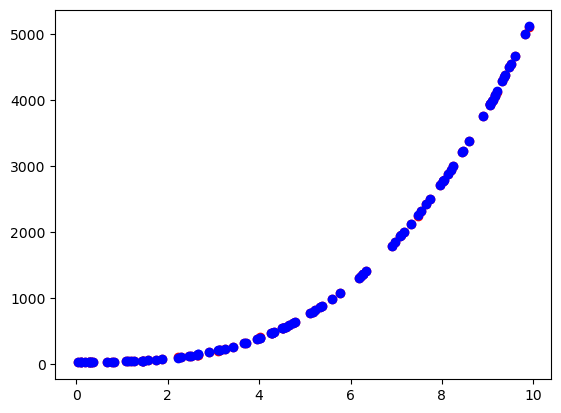

In [19]:
# View regression coefficients
print('Coefficients:',model.coef_)
# view intercept
print('intercept:',model.intercept_)  

# Draw scatter plots、
plt.scatter(xtest, ytest, color='r')
plt.scatter(xtest, ytest_predict, color='b')    
plt.show()

In [20]:
print(model.score(xtest_features_poly,ytest))
print("MAE:", MAE(ytest, ytest_predict))
print("MSE:", MSE(ytest, ytest_predict))
print("RMSE:", RMSE(ytest, ytest_predict))
print("MAPE:", MAPE(ytest, ytest_predict))
print("R2:", R2(ytest, ytest_predict), model.score(xtest_features_poly, ytest))

0.9999991398485869
MAE: 1.2459588766568617
MSE: 2.1411898407565655
RMSE: 1.4632805065183385
MAPE: 0.0115492759475584
R2: 0.9999991398485869 0.9999991398485869
